## NHGR

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

SEEDS = [5,26,47,76,92]

ENVIRONMENT_NAME = "MOLavaGridDR-v0" # CHANGE THIS TO THE NAME OF THE ENVIRONMENT
METRIC = "NHGR" # CHANGE THIS TO THE DESIRED METRIC

In [32]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..')))

from helpers.utils import ENVIRONMENTS_MAP, ENVIRONMENT_TO_ALGORITHMS_MAP, \
ALGORITHMS_NAME_MAP, ALGORITHMS_COLOR_MAP

# Get the algorithms for the type of environment (e.g. discrete, continuous, pixel)
ALGORITHMS = ENVIRONMENT_TO_ALGORITHMS_MAP[ENVIRONMENT_NAME]
# Get the evaluation environemnts for the domain
ENVIRONMENTS = ENVIRONMENTS_MAP[ENVIRONMENT_NAME]
# ENVIRONMENTS.remove("MOSuperMarioBros-3-3-v2")

In [33]:
def load_scores(env_id, algorithms, seeds, metric):
    scores = {}
    for algorithm in algorithms:
        algorithm_name = ALGORITHMS_NAME_MAP[algorithm]
        scores[algorithm_name] = {}
        for env in ENVIRONMENTS:
            for seed in seeds:
                df = pd.read_csv(f"../data/scores/{env_id}/{algorithm}/seed_{seed}.csv", index_col=0)
                metric_values = df.loc[metric + f"/{env}"].values
                scores[algorithm_name].setdefault(env, []).extend(metric_values)
    return scores

def convert_to_matrix(score_dict):
    keys = sorted(list(score_dict.keys()))
    return np.stack([score_dict[k] for k in keys], axis=1)

In [34]:
scores_dict = load_scores(ENVIRONMENT_NAME, ALGORITHMS, SEEDS, METRIC)
for algo in scores_dict.keys():
    scores_dict[algo] = convert_to_matrix(scores_dict[algo])
scores_dict

{'MORL-D(SB+PSA)': array([[0.41302477, 0.68453165, 0.46548724, 0.35019154, 0.3900068 ,
         0.20576394, 0.07691937, 0.55385575],
        [0.7259155 , 0.59370605, 0.71577418, 0.73551508, 0.66695765,
         0.34907422, 0.80848139, 0.77911358],
        [0.59821795, 0.72396049, 0.36004073, 0.73455063, 0.73140863,
         0.17525008, 0.7804837 , 0.86770289],
        [0.81697734, 0.49018794, 0.68994012, 0.47160141, 0.92215382,
         0.33208907, 0.63148545, 0.98032891],
        [0.65208183, 0.6867506 , 0.67031806, 0.67563946, 0.7799985 ,
         0.13161474, 0.76437897, 0.98032891]]),
 'MORL-D(SB)': array([[0.8843236 , 0.67894718, 0.64136873, 0.72624523, 0.92215382,
         0.74458746, 0.87505159, 0.98032891],
        [0.78234221, 0.64758869, 0.68279523, 0.9403443 , 0.62227281,
         0.25233112, 0.63611764, 0.76412054],
        [0.74668735, 0.73239729, 0.74835931, 0.90911823, 0.92215382,
         0.65010596, 0.68436177, 0.96630549],
        [0.66125415, 0.68672708, 0.42294366, 0

Best algorithm: MORL-D(SB)


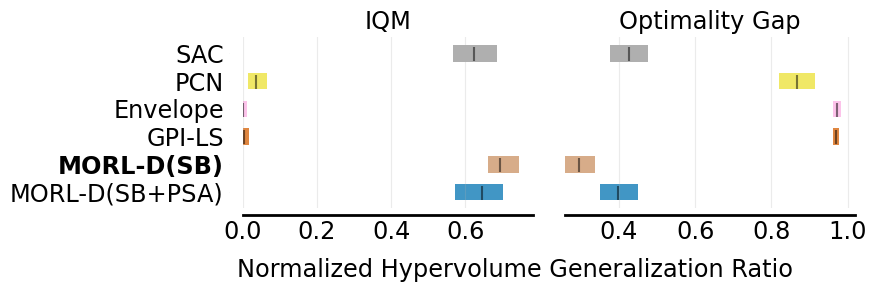

Aggregate scores: {'MORL-D(SB+PSA)': array([0.64489428, 0.39595478]), 'MORL-D(SB)': array([0.69308039, 0.29614267]), 'GPI-LS': array([0.00263505, 0.96885322]), 'Envelope': array([6.55303106e-04, 9.71788954e-01]), 'PCN': array([0.03718669, 0.86787511]), 'SAC': array([0.62359383, 0.4258382 ])}
Aggregate interval estimates: {'MORL-D(SB+PSA)': array([[0.57297049, 0.34876978],
       [0.69991598, 0.44892377]]), 'MORL-D(SB)': array([[0.6599132 , 0.25702474],
       [0.74372563, 0.33642234]]), 'GPI-LS': array([[0.        , 0.96088796],
       [0.01607606, 0.97659329]]), 'Envelope': array([[0.        , 0.96229193],
       [0.01256764, 0.98233931]]), 'PCN': array([[0.01365575, 0.81917867],
       [0.06673719, 0.91524686]]), 'SAC': array([[0.56584572, 0.37656743],
       [0.68443728, 0.47505841]])}


In [35]:
from rliable import library as rly
from rliable import metrics
from helpers.rliable import plot_interval_estimates

IQM = lambda x: metrics.aggregate_iqm(x)                    # Interquartile Mean
OG = lambda x: metrics.aggregate_optimality_gap(x, 1.0)     # Optimality Gap

aggregate_func = lambda x: np.array([IQM(x), OG(x)])
aggregate_scores, aggregate_interval_estimates = rly.get_interval_estimates(
    scores_dict, aggregate_func, reps=50000)

fig, axes = plot_interval_estimates(
    aggregate_scores, 
    aggregate_interval_estimates,
    metric_names = ['IQM', 'Optimality Gap'],
    algorithms=list(scores_dict.keys()),
    colors=ALGORITHMS_COLOR_MAP,
    xlabel_y_coordinate=-0.2, # -0.45 for mario
    bold_best=True, # Bold the best algorithm
    # subfigure_width=3.6,
    # max_ticks=3,
    xlabel='Normalized Hypervolume Generalization Ratio')

# Change svg to png/jpg if you want to save the figure in a different bitmap format
plt.savefig(f'../images/{ENVIRONMENT_NAME}_{METRIC}_IQM_OG.svg', format='svg', bbox_inches='tight')
plt.show()

print("Aggregate scores:", aggregate_scores)
print("Aggregate interval estimates:", aggregate_interval_estimates)

## EUGR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

SEEDS = [5,26,47,76,92]

ENVIRONMENT_NAME = "MOHopperDR-v5" # CHANGE THIS TO THE NAME OF THE ENVIRONMENT
METRIC = "EUGR" # CHANGE THIS TO THE DESIRED METRIC

In [2]:
from helpers.utils import ENVIRONMENTS_MAP, ENVIRONMENT_TO_ALGORITHMS_MAP, \
ALGORITHMS_NAME_MAP, ALGORITHMS_COLOR_MAP

# Get the algorithms for the type of environment (e.g. discrete, continuous, pixel)
ALGORITHMS = ENVIRONMENT_TO_ALGORITHMS_MAP[ENVIRONMENT_NAME]
# Get the evaluation environemnts for the domain
ENVIRONMENTS = ENVIRONMENTS_MAP[ENVIRONMENT_NAME]
# ENVIRONMENTS.remove("MOSuperMarioBros-3-3-v2")

In [3]:
def load_scores(env_id, algorithms, seeds, metric):
    scores = {}
    if metric == "NHGR":
        path = "nhgr_scores"
    elif metric == "EUGR":
        path = "eugr_scores"
    for algorithm in algorithms:
        algorithm_name = ALGORITHMS_NAME_MAP[algorithm]
        scores[algorithm_name] = {}
        for env in ENVIRONMENTS:
            for seed in seeds:
                df = pd.read_csv(f"data/{path}/{env_id}/{algorithm}/seed_{seed}.csv")
                metric_values = df[metric + f"/{env}"].values
                scores[algorithm_name].setdefault(env, []).extend(metric_values)
    return scores

def convert_to_matrix(score_dict):
    keys = sorted(list(score_dict.keys()))
    return np.stack([score_dict[k] for k in keys], axis=1)

In [4]:
scores_dict = load_scores(ENVIRONMENT_NAME, ALGORITHMS, SEEDS, METRIC)
for algo in scores_dict.keys():
    scores_dict[algo] = convert_to_matrix(scores_dict[algo])
scores_dict

{'MORL-D(SB+PSA)': array([[0.85691733, 0.76455157, 0.91957574, 0.61755204, 0.90182724,
         0.87989381],
        [0.89248812, 0.7774687 , 0.92266224, 0.66113376, 0.91630099,
         0.83900407],
        [0.8580138 , 0.78104703, 0.92663879, 0.65269816, 0.88654522,
         0.85376574],
        [0.91365464, 0.79533488, 0.9411078 , 0.64175757, 0.91911298,
         0.80776061],
        [0.90424333, 0.72994222, 0.93540223, 0.60755784, 0.90115884,
         0.8551724 ]]),
 'MORL-D(SB)': array([[0.82572843, 0.76846766, 0.90236868, 0.58350127, 0.84804516,
         0.86000576],
        [0.84482356, 0.71461084, 0.90554057, 0.62918313, 0.86077276,
         0.68739042],
        [0.86246887, 0.75469148, 0.90409689, 0.59663   , 0.8864742 ,
         0.84607978],
        [0.89507896, 0.75696702, 0.9031697 , 0.59771756, 0.91785169,
         0.77806909],
        [0.86386965, 0.80179674, 0.92402344, 0.60321153, 0.91854043,
         0.6493104 ]]),
 'GPI-PD': array([[0.82915682, 0.74135113, 0.89989183,

Best algorithm: MORL-D(SB+PSA)


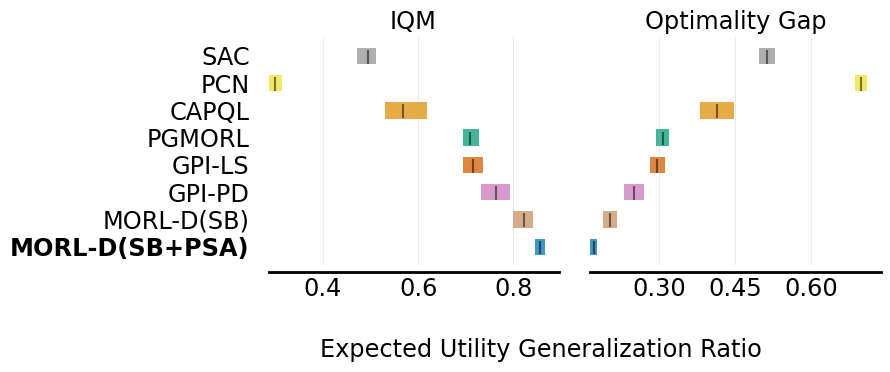

Aggregate scores: {'MORL-D(SB+PSA)': array([0.85651848, 0.17132368]), 'MORL-D(SB)': array([0.82299687, 0.20365048]), 'GPI-PD': array([0.76446057, 0.25025052]), 'GPI-LS': array([0.71605008, 0.29678793]), 'PGMORL': array([0.70818927, 0.30681484]), 'CAPQL': array([0.56739259, 0.41491099]), 'PCN': array([0.29982797, 0.6984344 ]), 'SAC': array([0.49413204, 0.51260444])}
Aggregate interval estimates: {'MORL-D(SB+PSA)': array([[0.84602892, 0.16457915],
       [0.86589131, 0.1784383 ]]), 'MORL-D(SB)': array([[0.79933915, 0.18989645],
       [0.84132886, 0.21794212]]), 'GPI-PD': array([[0.73193995, 0.23093582],
       [0.79257984, 0.27073678]]), 'GPI-LS': array([[0.69407199, 0.2823843 ],
       [0.73536944, 0.31197126]]), 'PGMORL': array([[0.6935654 , 0.2938595 ],
       [0.72718588, 0.31944673]]), 'CAPQL': array([[0.52926809, 0.38063559],
       [0.6178557 , 0.44801307]]), 'PCN': array([[0.28554822, 0.68693338],
       [0.3144921 , 0.70987477]]), 'SAC': array([[0.47179726, 0.49644264],
       

In [5]:
from rliable import library as rly
from rliable import metrics
from helpers.rliable import plot_interval_estimates

IQM = lambda x: metrics.aggregate_iqm(x)                    # Interquartile Mean
OG = lambda x: metrics.aggregate_optimality_gap(x, 1.0)     # Optimality Gap

aggregate_func = lambda x: np.array([IQM(x), OG(x)])
aggregate_scores, aggregate_interval_estimates = rly.get_interval_estimates(
    scores_dict, aggregate_func, reps=50000)

fig, axes = plot_interval_estimates(
    aggregate_scores, 
    aggregate_interval_estimates,
    metric_names = ['IQM', 'Optimality Gap'],
    algorithms=list(scores_dict.keys()),
    colors=ALGORITHMS_COLOR_MAP,
    xlabel_y_coordinate=-0.2,
    bold_best=True, # Bold the best algorithm
    # subfigure_width=3.6,
    max_ticks=4,
    xlabel='Expected Utility Generalization Ratio')

# Change svg to png/jpg if you want to save the figure in a different bitmap format
plt.savefig(f'images/{ENVIRONMENT_NAME}_{METRIC}_IQM_OG.svg', format='svg', bbox_inches='tight')
plt.show()

print("Aggregate scores:", aggregate_scores)
print("Aggregate interval estimates:", aggregate_interval_estimates)

In [ ]:
# from matplotlib.ticker import MaxNLocator
# from rliable import plot_utils

# all_pairs = {}
# best_algo = 'MORL-D(SB+PSA)'
# for alg_y in (scores_dict.keys()):
#   if alg_y == best_algo:
#     continue
#   pair_name = f'{best_algo},{alg_y}'
#   all_pairs[pair_name] = (scores_dict[best_algo], scores_dict[alg_y]) 

# probabilities, probability_cis = {}, {}
# probabilities, probability_cis = rly.get_interval_estimates(all_pairs, metrics.probability_of_improvement, reps=2000)

# fig, ax = plt.subplots(figsize=(4, 3))
# h = 0.6
# algorithm_labels = []

# for i, (alg_pair, prob) in enumerate(probabilities.items()):
#   _, alg1 = alg_pair.split(',')
#   algorithm_labels.append(alg1)
#   (l, u) = probability_cis[alg_pair]
#   ax.barh(y=i, width=u-l, height=h, left=l, color=ALGORITHMS_COLOR_MAP[alg1], alpha=0.75)
#   ax.vlines(x=prob, ymin=i-7.5 * h/16, ymax=i+(6*h/16), color='k', alpha=0.85)
# ax.set_yticks(range(len(algorithm_labels)))
# ax.set_yticklabels(algorithm_labels)


# ax.set_title(fr'P({best_algo} > $Y$)', size='xx-large')
# plot_utils._annotate_and_decorate_axis(ax, labelsize='xx-large', ticklabelsize='xx-large')
# ax.set_ylabel(r'Algorithm $Y$', size='xx-large')
# ax.xaxis.set_major_locator(MaxNLocator(4))
# fig.subplots_adjust(wspace=0.25, hspace=0.45)

# plt.savefig(f'images/{ENVIRONMENT_NAME}_PROB_IMPROVEMENT.png', format='png', bbox_inches='tight')
# plt.show()